In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [2]:
## Load the dataset

df = pd.read_csv('Train Dataset.csv')
df.head()

,Unnamed: 0,timestamp,irradiance_global_reference,irradiance_horizontal,module_temperature_1,module_temperature_2,module_temperature_3,wind_direction,relative_humidity,horizontal_radiation_1,...,incident_radiation_2,incident_radiation_4,incident_radiation_3,reflected_radiation_1,reflected_radiation_2,reflected_radiation_4,reflected_radiation_3,ambient_temperature,wind_speed,ghi
0,0.0,10/1/2024 0:00,0.0,0.0,22.143874,21.766006,21.887832,166.493537,99.996814,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.450315,0.000000,0.0
1,1.0,10/1/2024 1:00,0.0,0.0,21.903667,21.491851,21.646608,257.272004,99.996272,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.215215,0.000000,0.0
2,2.0,10/1/2024 2:00,0.0,0.0,22.539134,22.290230,22.319763,212.567154,99.996691,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.301205,0.000000,0.0
3,3.0,10/1/2024 3:00,0.0,0.0,22.686070,22.513330,22.484921,157.928208,99.996403,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.352792,1.832727,0.0
4,4.0,10/1/2024 4:00,0.0,0.0,23.157860,22.858801,22.862068,142.271059,99.997145,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.505781,0.000000,0.0


In [3]:
## load test dataset

df_test = pd.read_csv('Test Dataset.csv')
df_test.head()

,Unnamed: 0,timestamp,irradiance_global_reference,irradiance_horizontal,module_temperature_1,module_temperature_2,module_temperature_3,wind_direction,relative_humidity,horizontal_radiation_1,...,incident_radiation_2,incident_radiation_4,incident_radiation_3,reflected_radiation_1,reflected_radiation_2,reflected_radiation_4,reflected_radiation_3,ambient_temperature,wind_speed,ghi
0,0,1/1/2025 0:00,0.285714,0.0,23.626821,23.266443,23.232009,214.910610,99.996957,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,24.831933,3.045155,0.0
1,1,1/1/2025 1:00,0.000000,0.0,23.129682,23.377654,23.620484,205.611449,99.997701,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,24.771164,2.050489,0.0
2,2,1/1/2025 2:00,0.000000,0.0,22.944849,23.238609,23.335719,228.614596,99.996967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,24.483298,1.682308,0.0
3,3,1/1/2025 3:00,0.000000,0.0,22.608518,22.834374,22.592660,262.363307,99.996572,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,24.161436,2.051471,0.0
4,4,1/1/2025 4:00,0.000000,0.0,22.526881,22.532197,22.439363,294.298920,99.995857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,23.682787,0.570000,0.0


## Data Preprocessing

In [4]:
## drop 'Unnamed: 0' column

df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,timestamp,irradiance_global_reference,irradiance_horizontal,module_temperature_1,module_temperature_2,module_temperature_3,wind_direction,relative_humidity,horizontal_radiation_1,horizontal_radiation_2,...,incident_radiation_2,incident_radiation_4,incident_radiation_3,reflected_radiation_1,reflected_radiation_2,reflected_radiation_4,reflected_radiation_3,ambient_temperature,wind_speed,ghi
0,10/1/2024 0:00,0.0,0.0,22.143874,21.766006,21.887832,166.493537,99.996814,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.450315,0.000000,0.0
1,10/1/2024 1:00,0.0,0.0,21.903667,21.491851,21.646608,257.272004,99.996272,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.215215,0.000000,0.0
2,10/1/2024 2:00,0.0,0.0,22.539134,22.290230,22.319763,212.567154,99.996691,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.301205,0.000000,0.0
3,10/1/2024 3:00,0.0,0.0,22.686070,22.513330,22.484921,157.928208,99.996403,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.352792,1.832727,0.0
4,10/1/2024 4:00,0.0,0.0,23.157860,22.858801,22.862068,142.271059,99.997145,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,23.505781,0.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    2182 non-null   object 
 1   irradiance_global_reference  2182 non-null   float64
 2   irradiance_horizontal        2182 non-null   float64
 3   module_temperature_1         2166 non-null   float64
 4   module_temperature_2         2155 non-null   float64
 5   module_temperature_3         2150 non-null   float64
 6   wind_direction               2182 non-null   float64
 7   relative_humidity            2182 non-null   float64
 8   horizontal_radiation_1       2182 non-null   float64
 9   horizontal_radiation_2       9 non-null      float64
 10  horizontal_radiation_3       1331 non-null   float64
 11  incident_radiation_1         2182 non-null   float64
 12  incident_radiation_2         744 non-null    float64
 13  incident_radiation

In [6]:
## Checking for missing values

df.isna().sum()

timestamp                        24
irradiance_global_reference      24
irradiance_horizontal            24
module_temperature_1             40
module_temperature_2             51
module_temperature_3             56
wind_direction                   24
relative_humidity                24
horizontal_radiation_1           24
horizontal_radiation_2         2197
horizontal_radiation_3          875
incident_radiation_1             24
incident_radiation_2           1462
incident_radiation_4             51
incident_radiation_3            875
reflected_radiation_1            24
reflected_radiation_2          1461
reflected_radiation_4            51
reflected_radiation_3           875
ambient_temperature              24
wind_speed                       24
ghi                              24
dtype: int64

In [7]:
#  Drop rows with missing target

df = df[~(df['ghi'].isna())]

In [8]:
df.isna().sum()

timestamp                         0
irradiance_global_reference       0
irradiance_horizontal             0
module_temperature_1             16
module_temperature_2             27
module_temperature_3             32
wind_direction                    0
relative_humidity                 0
horizontal_radiation_1            0
horizontal_radiation_2         2173
horizontal_radiation_3          851
incident_radiation_1              0
incident_radiation_2           1438
incident_radiation_4             27
incident_radiation_3            851
reflected_radiation_1             0
reflected_radiation_2          1437
reflected_radiation_4            27
reflected_radiation_3           851
ambient_temperature               0
wind_speed                        0
ghi                               0
dtype: int64

In [9]:
## Checking for data types

df.dtypes

timestamp                       object
irradiance_global_reference    float64
irradiance_horizontal          float64
module_temperature_1           float64
module_temperature_2           float64
module_temperature_3           float64
wind_direction                 float64
relative_humidity              float64
horizontal_radiation_1         float64
horizontal_radiation_2         float64
horizontal_radiation_3         float64
incident_radiation_1           float64
incident_radiation_2           float64
incident_radiation_4           float64
incident_radiation_3           float64
reflected_radiation_1          float64
reflected_radiation_2          float64
reflected_radiation_4          float64
reflected_radiation_3          float64
ambient_temperature            float64
wind_speed                     float64
ghi                            float64
dtype: object

In [10]:
## Checking for missing values in test dataset

df_test.isna().sum()

Unnamed: 0                        0
timestamp                         0
irradiance_global_reference       0
irradiance_horizontal             0
module_temperature_1              5
module_temperature_2              7
module_temperature_3              7
wind_direction                  107
relative_humidity               107
horizontal_radiation_1          107
horizontal_radiation_2         1389
horizontal_radiation_3            0
incident_radiation_1            107
incident_radiation_2              6
incident_radiation_4              7
incident_radiation_3              0
reflected_radiation_1           108
reflected_radiation_2             6
reflected_radiation_4             9
reflected_radiation_3             0
ambient_temperature             107
wind_speed                      107
ghi                               0
dtype: int64

In [11]:
## Drop rows with more than 65% missing values in train dataset

df.drop(['horizontal_radiation_2','incident_radiation_2','reflected_radiation_2'],inplace=True,axis=1)

In [12]:
df.isnull().sum()

timestamp                        0
irradiance_global_reference      0
irradiance_horizontal            0
module_temperature_1            16
module_temperature_2            27
module_temperature_3            32
wind_direction                   0
relative_humidity                0
horizontal_radiation_1           0
horizontal_radiation_3         851
incident_radiation_1             0
incident_radiation_4            27
incident_radiation_3           851
reflected_radiation_1            0
reflected_radiation_4           27
reflected_radiation_3          851
ambient_temperature              0
wind_speed                       0
ghi                              0
dtype: int64

#### After dropping features with more than 65% missing values, we were left with a subset of features where some still had a moderate level of missing data (~40%).

#### Before deciding how to handle these features (e.g., imputation or removal), we performed correlation analysis.

#### Correlation analysis at this stage helps us assess both feature utility and redundancy, allowing us to make informed decisions about which features to keep, drop, or impute.

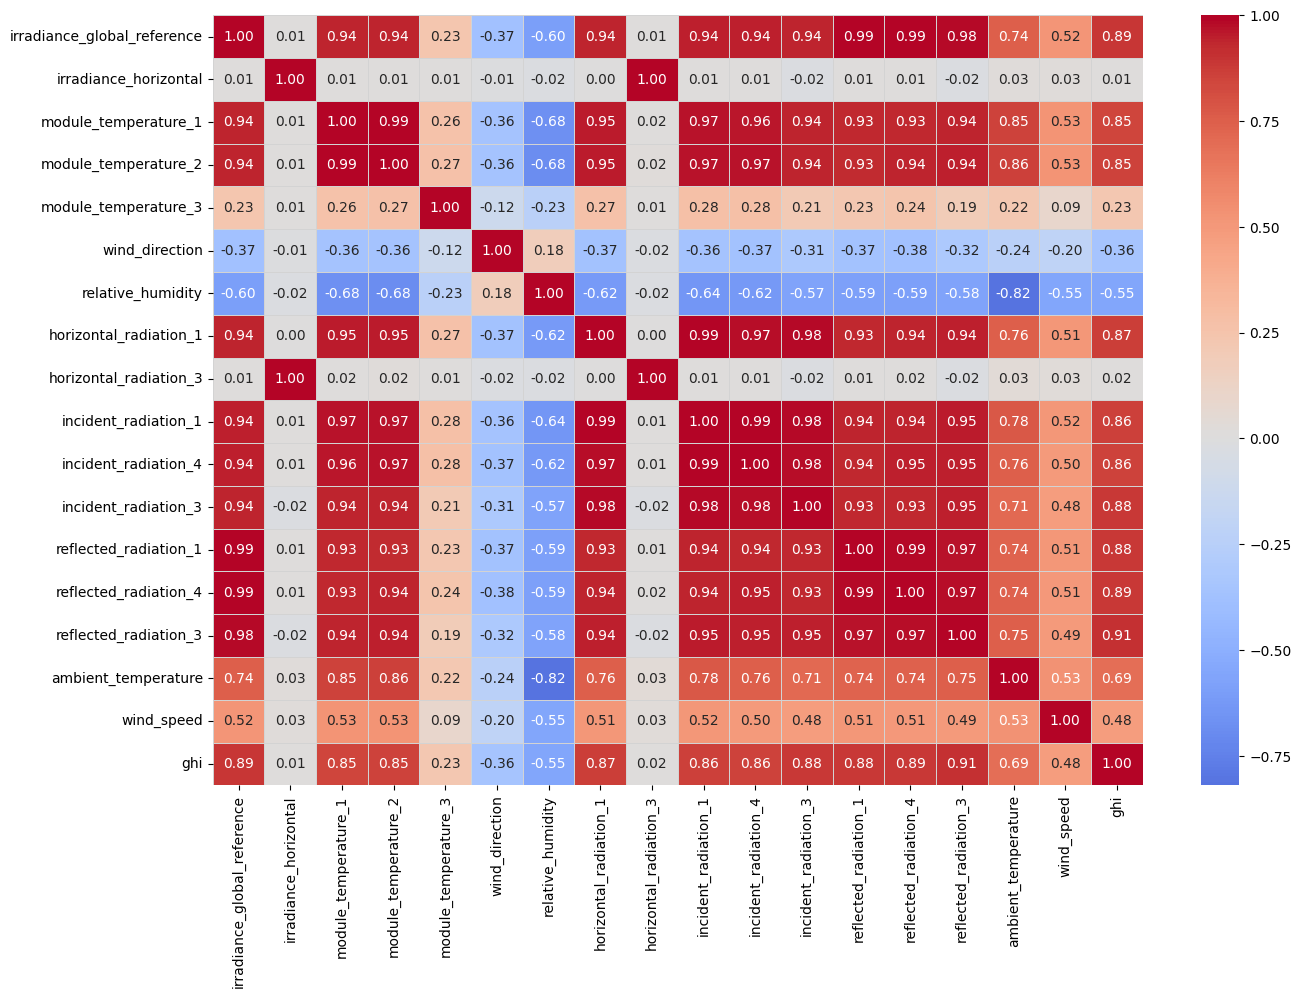

In [13]:
# Plotting the correlation heatmap

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

plt.show()

#### We observed that several features were highly correlated with other input features, often with correlation coefficients above 0.95. This level of multicollinearity introduces redundancy and adds unnecessary complexity to the model.

In [14]:
df.drop(['module_temperature_2','horizontal_radiation_1','incident_radiation_4','incident_radiation_3','reflected_radiation_4','reflected_radiation_3'],inplace=True,axis=1)

#### Some features were dropped in favor of retaining other strongly correlated counterparts that carry similar information.

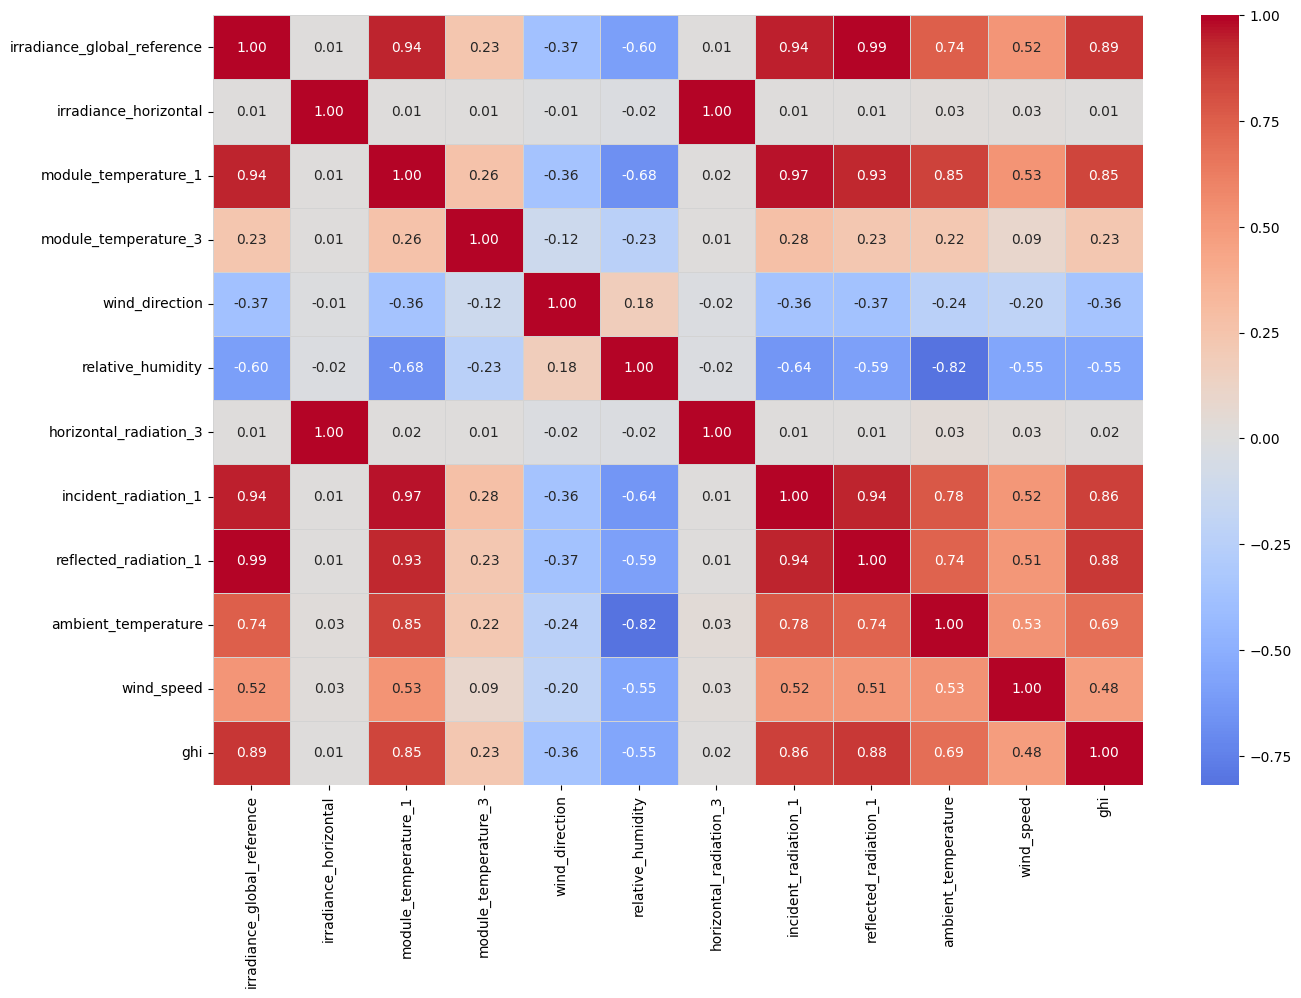

In [15]:
# Plotting the correlation heatmap

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

plt.show()

In [16]:
df.drop(['module_temperature_1','irradiance_global_reference','incident_radiation_1','reflected_radiation_1'],inplace=True,axis=1)

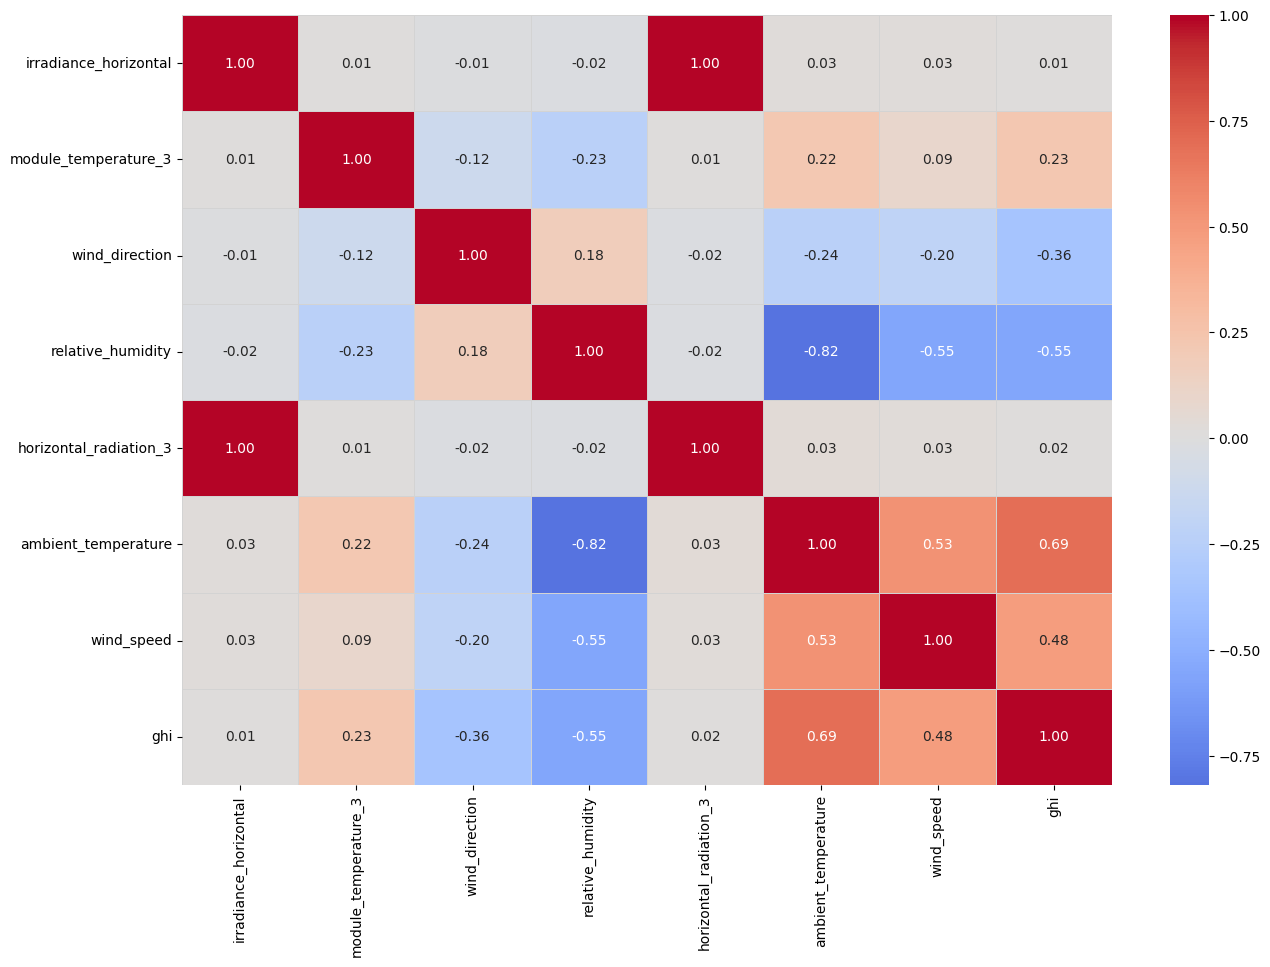

In [17]:
# Plotting the correlation heatmap

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

plt.show()

In [18]:
df.drop('horizontal_radiation_3',inplace=True,axis=1)

<Axes: >

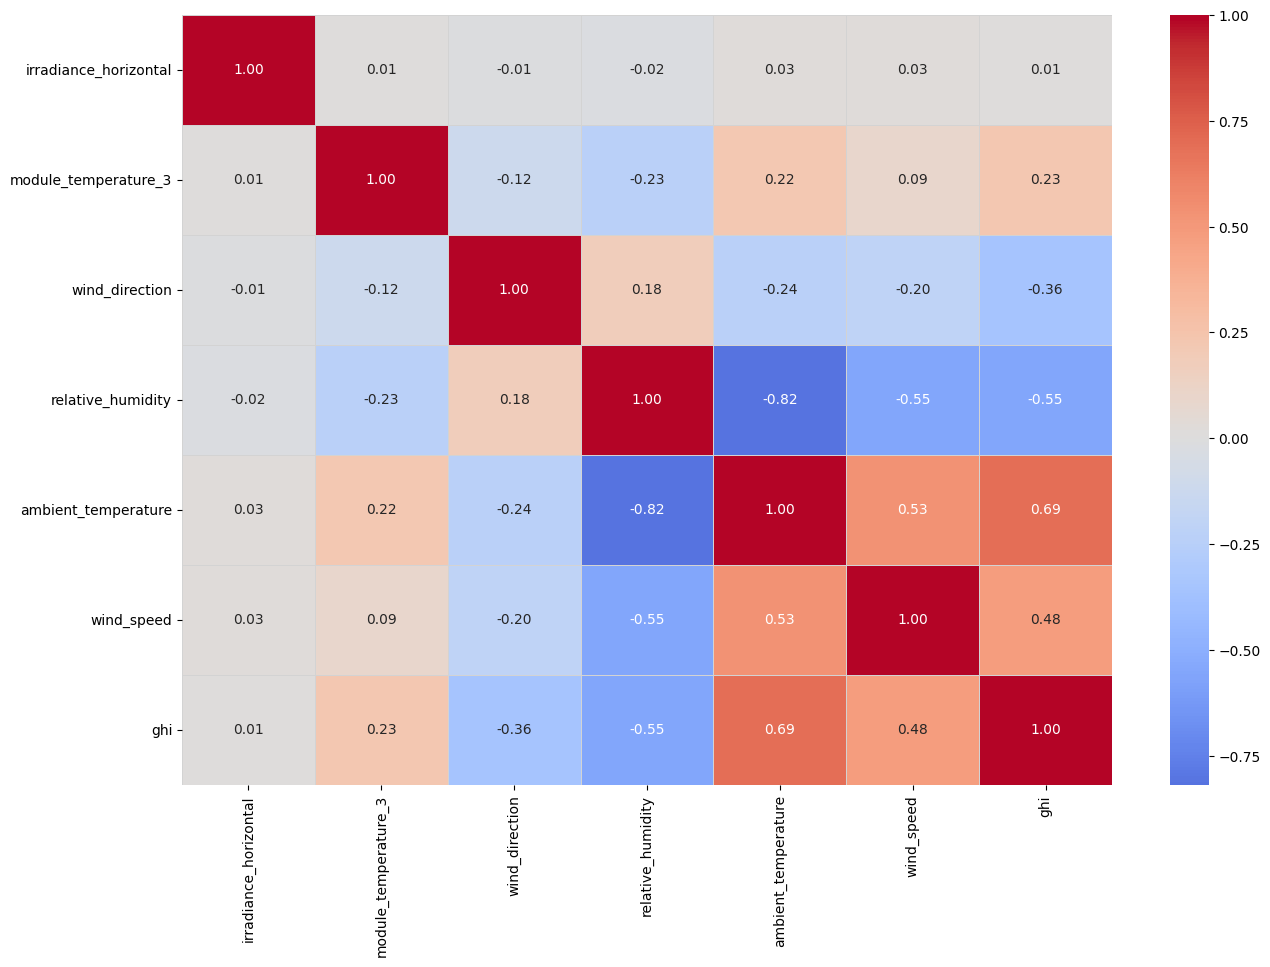

In [19]:
# Plotting the correlation heatmap

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

#### After performing multiple iterations of correlation heatmap analysis, we retained a refined set of features that provide relevant and non-redundant information for modeling.

#### The final correlation heatmap shows moderate correlations with the target and minimal inter-feature redundancy.

In [20]:
df.isna().sum()

timestamp                 0
irradiance_horizontal     0
module_temperature_3     32
wind_direction            0
relative_humidity         0
ambient_temperature       0
wind_speed                0
ghi                       0
dtype: int64

In [21]:
## Fill missing values in 'module_temperature_3' with median

df['module_temperature_3'].fillna(df['module_temperature_3'].median(),inplace=True)

In [22]:
df.isna().sum()

timestamp                0
irradiance_horizontal    0
module_temperature_3     0
wind_direction           0
relative_humidity        0
ambient_temperature      0
wind_speed               0
ghi                      0
dtype: int64

## Feature Engineering

In [23]:
## Convert 'timestamp' to datetime format

df["timestamp"] = pd.to_datetime(df["timestamp"])

In [24]:
df.head()

,timestamp,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi
0,2024-10-01 00:00:00,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0
1,2024-10-01 01:00:00,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0
2,2024-10-01 02:00:00,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0
3,2024-10-01 03:00:00,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0
4,2024-10-01 04:00:00,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0


In [25]:
## Extracting date and time features from the timestamp

df["hour"] = df["timestamp"].dt.hour
df["month"] = df["timestamp"].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [26]:
df.head()

,timestamp,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi,hour,month,day,dayofweek
0,2024-10-01 00:00:00,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0,0,10,1,1
1,2024-10-01 01:00:00,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0,1,10,1,1
2,2024-10-01 02:00:00,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0,2,10,1,1
3,2024-10-01 03:00:00,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0,3,10,1,1
4,2024-10-01 04:00:00,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0,4,10,1,1


In [27]:
def part_of_day(hour):
    
    """Classify the hour of the day into parts of the day."""
    
    if 5 <= hour < 8:
        return "dawn"
    elif 8 <= hour < 12:
        return "morning"
    elif 12 <= hour < 16:
        return "afternoon"
    elif 16 <= hour < 19:
        return "evening"
    else:
        return "night"


## Apply the function to create a new column 'part_of_day'

df["part_of_day"] = df["hour"].apply(part_of_day)
df.head()

,timestamp,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi,hour,month,day,dayofweek,part_of_day
0,2024-10-01 00:00:00,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0,0,10,1,1,night
1,2024-10-01 01:00:00,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0,1,10,1,1,night
2,2024-10-01 02:00:00,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0,2,10,1,1,night
3,2024-10-01 03:00:00,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0,3,10,1,1,night
4,2024-10-01 04:00:00,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0,4,10,1,1,night


In [28]:
## Create lag features for 'ghi'

df["ghi_lag_1"] = df["ghi"].shift(1)
df["ghi_diff_1"] = df["ghi"] - df["ghi"].shift(1)

##### ghi_lag_1 stores the ghi value from the previous time step, helping the model learn sequential patterns and smooth transitions in solar irradiance.

##### ghi_diff_1 captures the change in GHI between consecutive time steps, which reflects short-term trends or fluctuations due to weather changes.


<Axes: >

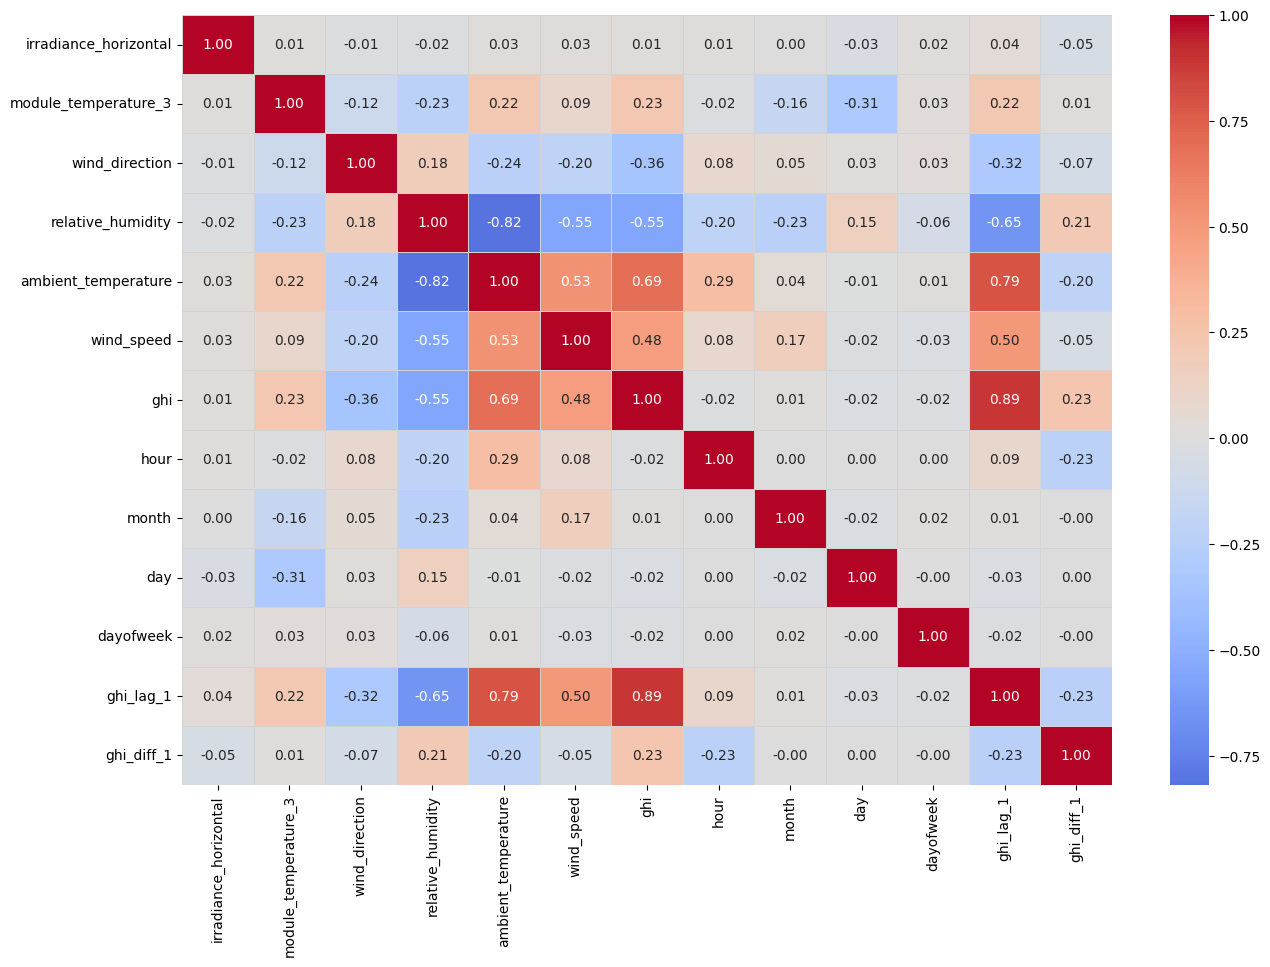

In [29]:
# Plotting the correlation heatmap

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

##### This final set of features gives us a clean, focused, and non-redundant dataset — which is exactly what we want before training a model. It should help the model make accurate predictions without being overwhelmed by noise or duplicate information.

In [30]:
## Fill missing values in lag features

df['ghi_lag_1'].fillna(method='bfill', inplace=True)
df["ghi_diff_1"].fillna(method='bfill', inplace=True)

In [31]:
df.head()

,timestamp,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi,hour,month,day,dayofweek,part_of_day,ghi_lag_1,ghi_diff_1
0,2024-10-01 00:00:00,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0,0,10,1,1,night,0.0,0.0
1,2024-10-01 01:00:00,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0,1,10,1,1,night,0.0,0.0
2,2024-10-01 02:00:00,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0,2,10,1,1,night,0.0,0.0
3,2024-10-01 03:00:00,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0,3,10,1,1,night,0.0,0.0
4,2024-10-01 04:00:00,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0,4,10,1,1,night,0.0,0.0


## Exploratory Data Analysis (EDA)

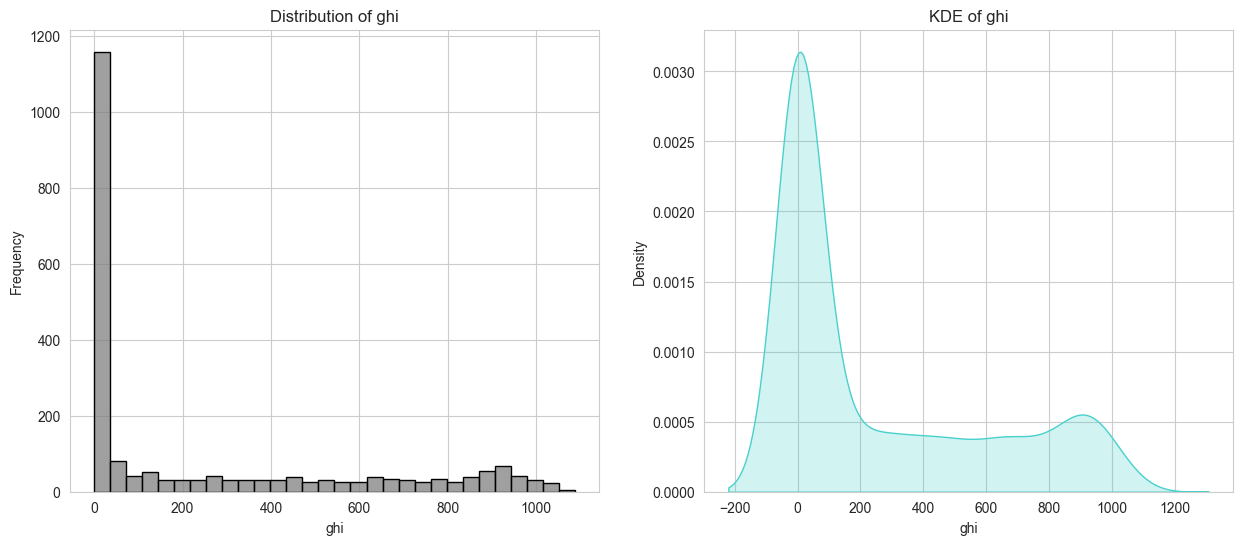

In [32]:
## Checking distribution of target variable

plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(df['ghi'], bins=30, color='grey', edgecolor='black')
plt.title('Distribution of ghi')
plt.xlabel('ghi')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df['ghi'], color='mediumturquoise', shade=True)
plt.title('KDE of ghi')
plt.xlabel('ghi')
plt.show()

##### Above plots highlight the non-normal and skewed distribution of GHI, which is expected in solar data due to daily light cycles and weather variations.

In [33]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ambient_temperature_by_day = df.groupby('dayofweek')['ambient_temperature'].mean()
ambient_temperature_by_partofday = df.groupby('part_of_day')['ambient_temperature'].mean()

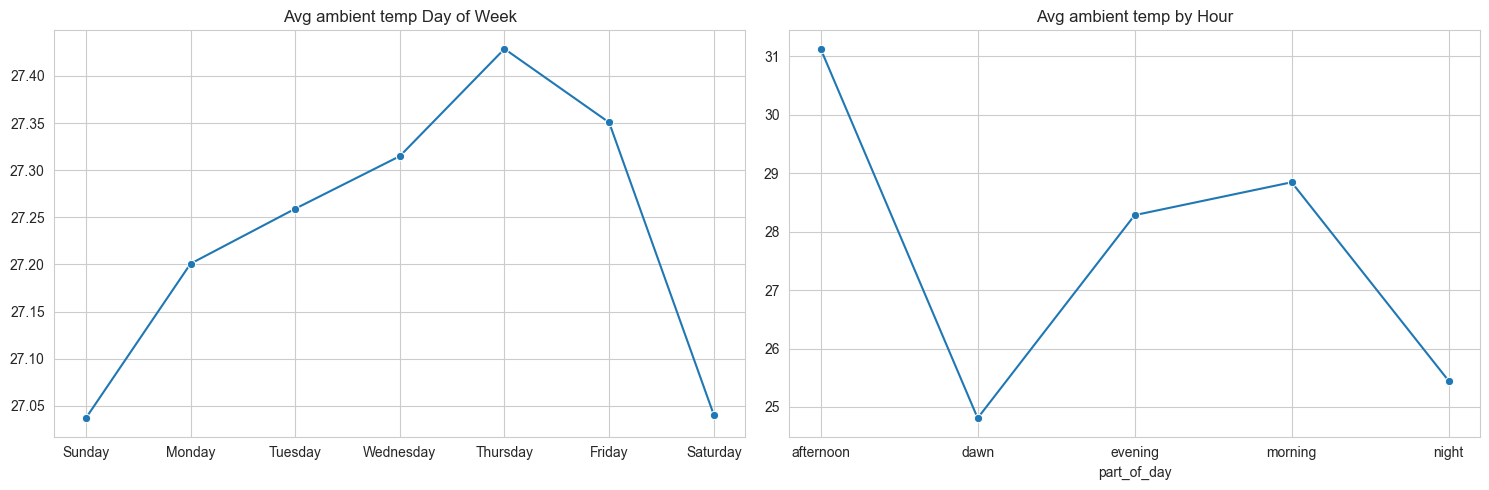

In [34]:
## Plotting mean ambient temperature by day of week and part of day

plt.figure(figsize=(15, 5))

# Mean Ambient temp by Day of Week
plt.subplot(1, 2, 1)
sns.lineplot(x=days, y=ambient_temperature_by_day.values, marker='o')
plt.title("Avg ambient temp Day of Week")

# Mean Ambient temp by part of day
plt.subplot(1, 2, 2)
sns.lineplot(x=ambient_temperature_by_partofday.index, y=ambient_temperature_by_partofday.values, marker='o')
plt.title("Avg ambient temp by Hour")

plt.tight_layout()
plt.show()

##### Left Plot (Avg Ambient Temp by Day of Week): 
##### This plot shows how average ambient temperature varies across different days. The temperature gradually rises from Sunday to Thursday, peaking on Thursday, and then slightly drops on Friday and Saturday.

##### Right Plot (Avg Ambient Temp by Part of Day):
##### This plot illustrates temperature variations throughout different parts of the day. The highest average temperature occurs in the afternoon, while the lowest is observed at dawn. This makes sense, since temperatures usually rise during the day as the sun comes up, and are lowest early in the morning before sunrise.

In [35]:
## Convert month number to month name

df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

In [36]:
## Grouping by month name to get mean ambient temperature and humidity

monthly_avg_temp = df.groupby('month')['ambient_temperature'].mean()
month_names = [calendar.month_name[i] for i in monthly_avg_temp.index]

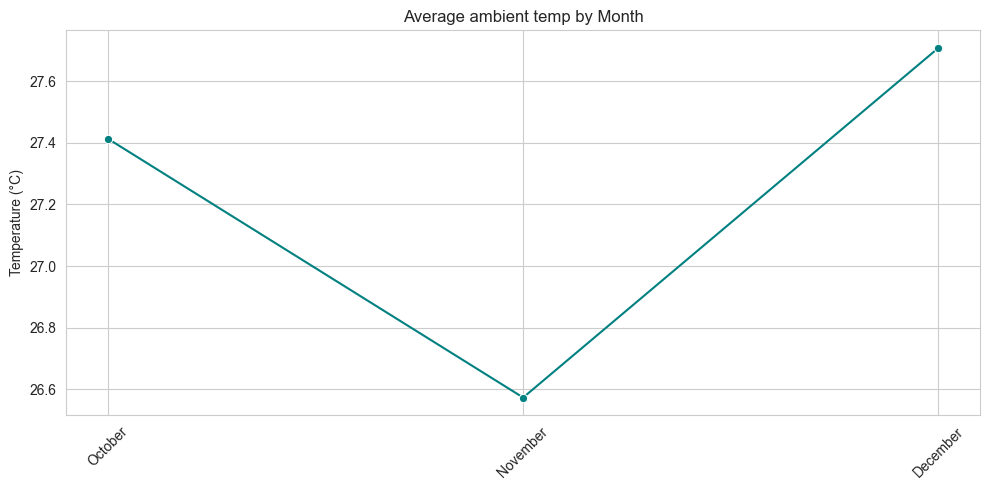

In [37]:
## Plotting mean outdoor ambient temperature by month

plt.figure(figsize=(10, 5))
sns.lineplot(x=month_names, y=monthly_avg_temp.values, marker='o', color='teal')
plt.title('Average ambient temp by Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### From the above plot, we cans see nearly consistent temperature across three months.

In [38]:
ghi_by_day = df.groupby('dayofweek')['ghi'].mean()
ghi_by_partofday = df.groupby('part_of_day')['ghi'].mean()

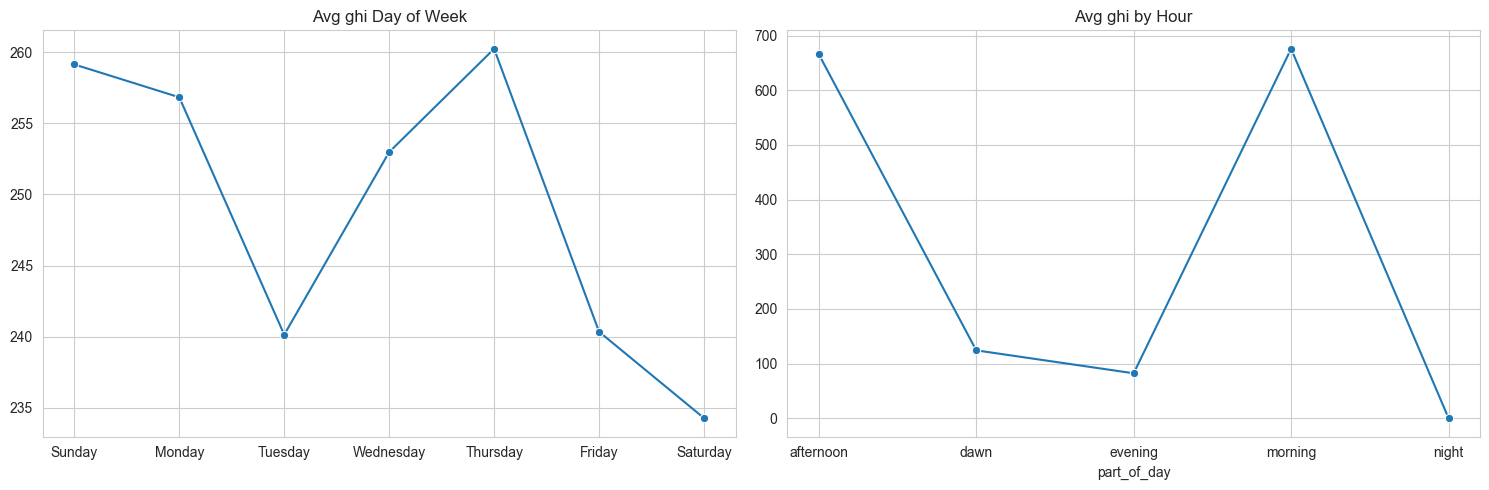

In [39]:
## Plotting mean ghi by day of week and part of day

plt.figure(figsize=(15, 5))

# Mean ghi by Day of Week
plt.subplot(1, 2, 1)
sns.lineplot(x=days, y=ghi_by_day.values, marker='o')
plt.title("Avg ghi Day of Week")

# Mean ghi by part of day
plt.subplot(1, 2, 2)
sns.lineplot(x = ghi_by_partofday.index, y = ghi_by_partofday.values, marker='o')
plt.title("Avg ghi by Hour")

plt.tight_layout()
plt.show()

##### Left Plot (by Day of Week):
##### GHI levels are highest on Thursday and Sunday, while Saturday and Tuesday show lower average values.

##### Right Plot (by Part of Day):
##### As expected, GHI is highest in the morning and afternoon, when the sun is strongest. It drops significantly during the evening, is lowest at night, and remains low during dawn, which aligns with the natural solar cycle.

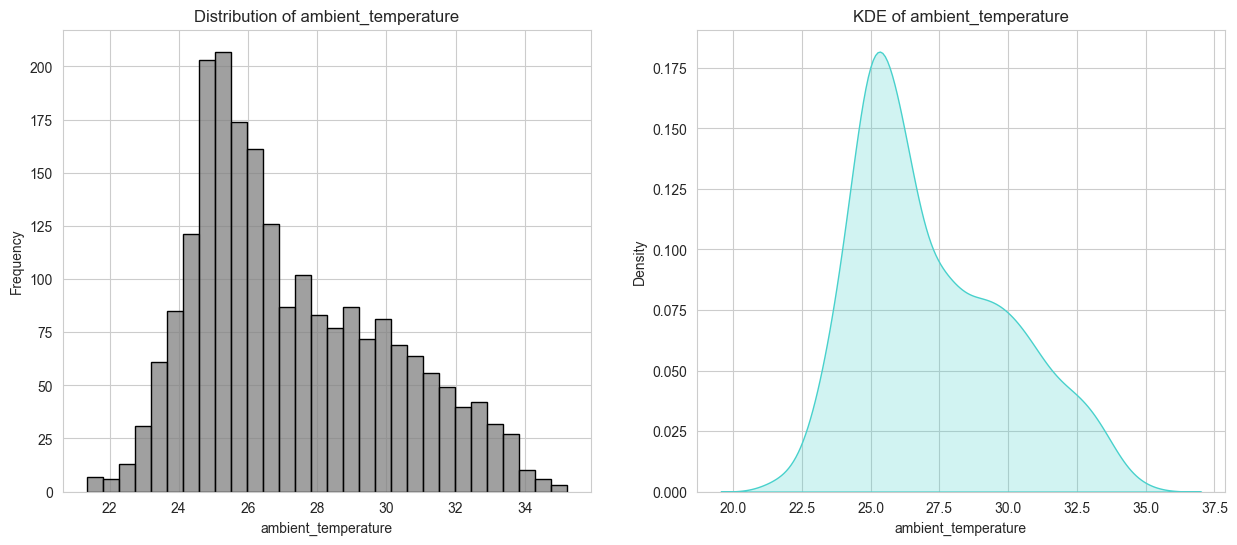

In [40]:
## Checking distribution of target variable

plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(df['ambient_temperature'], bins=30, color='grey', edgecolor='black')
plt.title('Distribution of ambient_temperature')
plt.xlabel('ambient_temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df['ambient_temperature'], color='mediumturquoise', shade=True)
plt.title('KDE of ambient_temperature')
plt.xlabel('ambient_temperature')
plt.show()

##### These plots indicate that ambient temperatures are generally moderate, with occasional hotter periods — which aligns with typical daytime heating patterns.

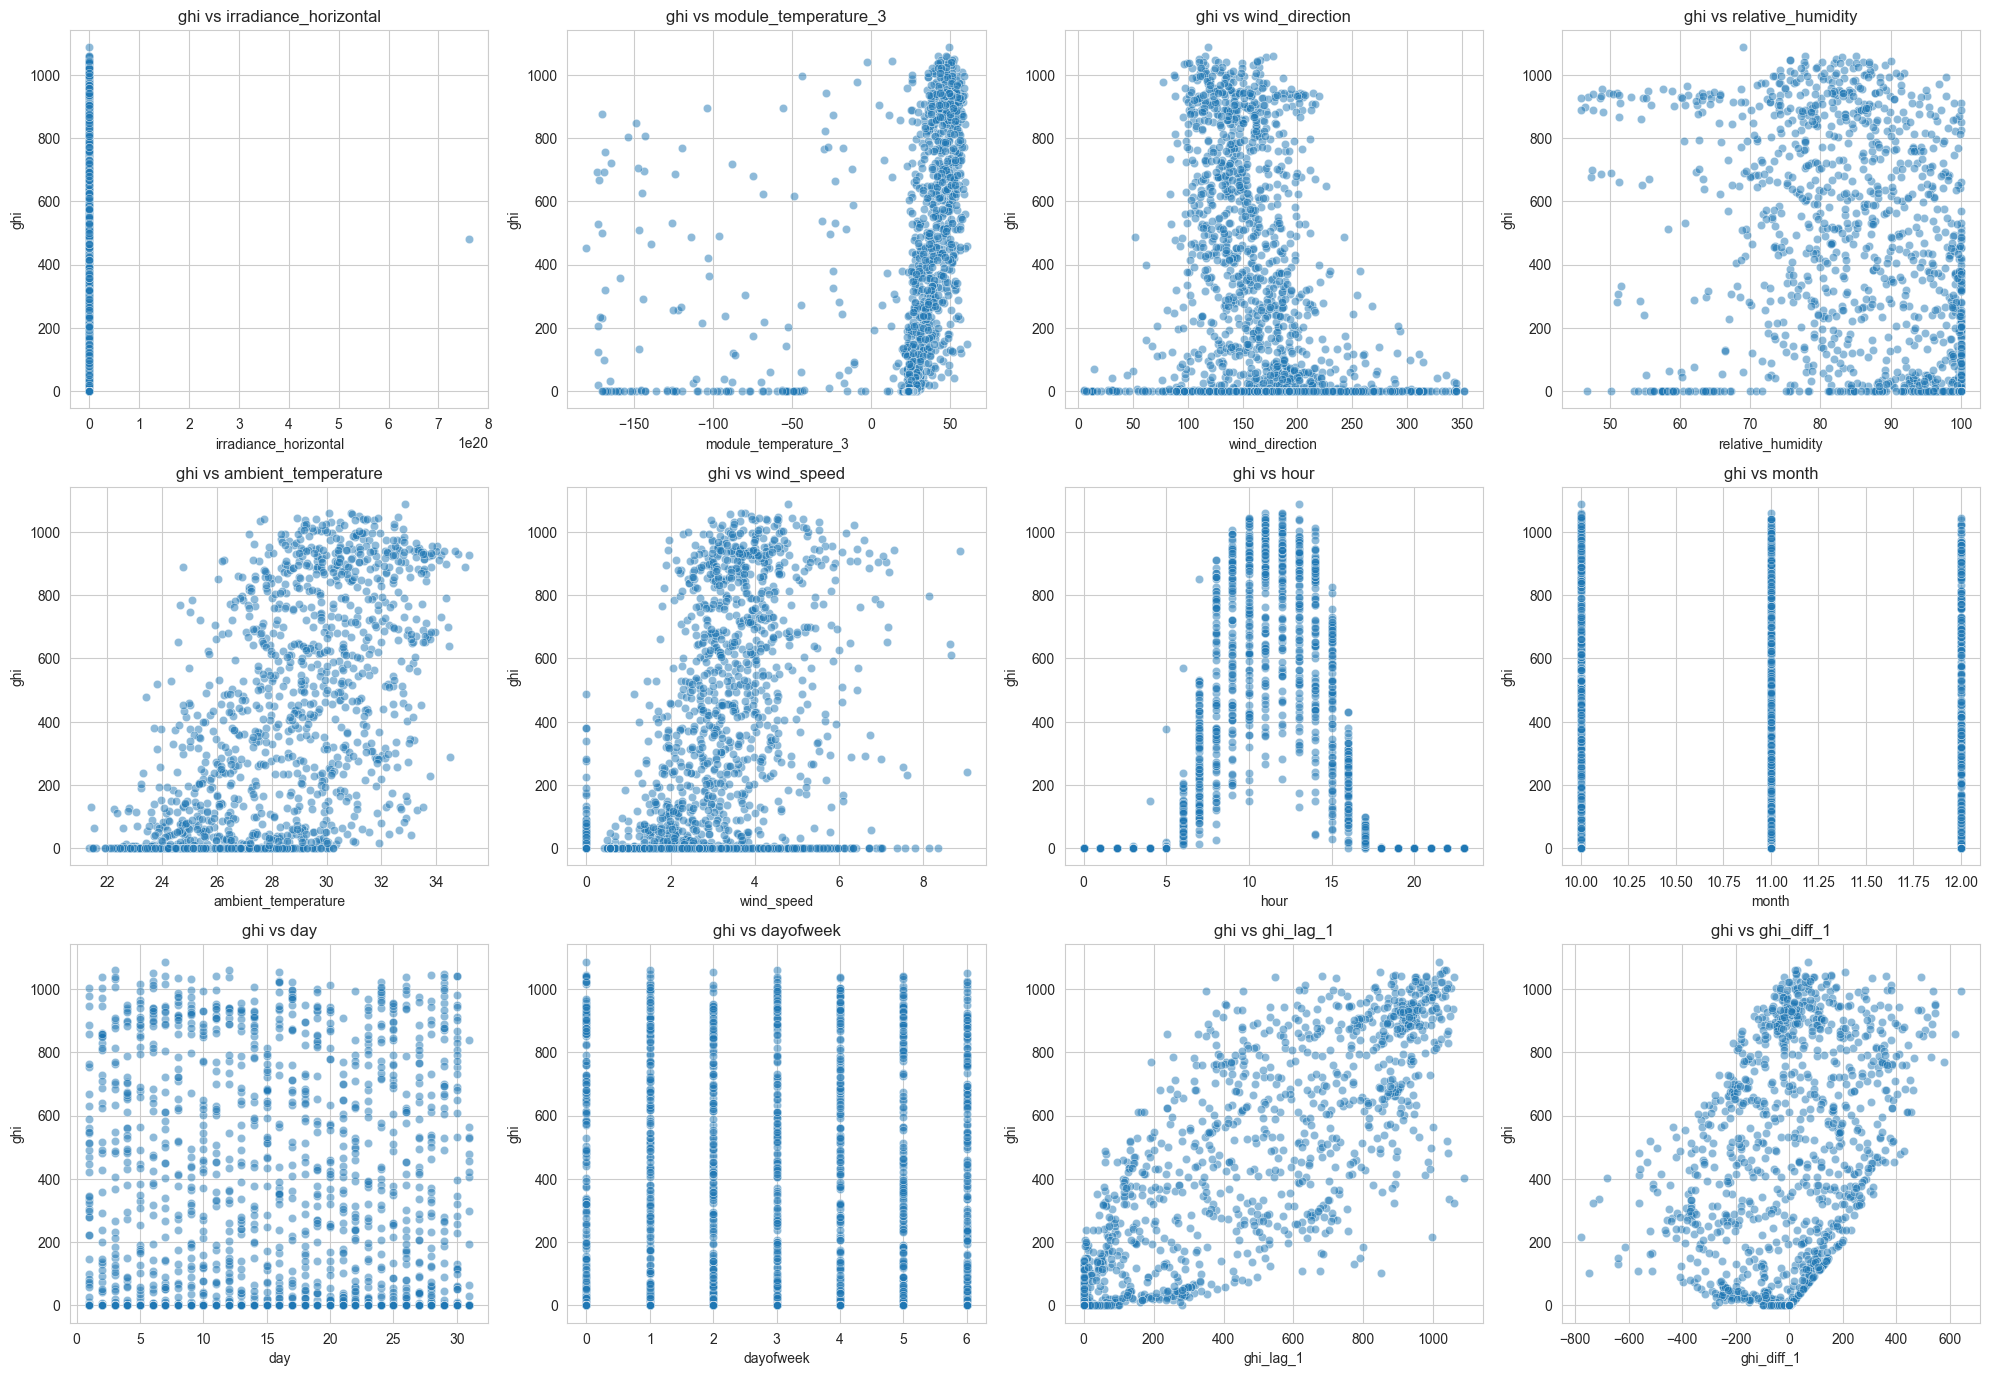

In [41]:
# List of independent variables (excluding timestamp, target)

independent_vars = [
    'irradiance_horizontal', 'module_temperature_3', 'wind_direction',
    'relative_humidity', 'ambient_temperature', 'wind_speed',
    'hour', 'month', 'day', 'dayofweek', 'ghi_lag_1', 'ghi_diff_1'
]

# Set up the plot grid
plt.figure(figsize=(20, 18))
for i, col in enumerate(independent_vars, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=col, y='ghi', alpha=0.5)
    plt.title(f'ghi vs {col}')
    plt.xlabel(col)
    plt.ylabel('ghi')

plt.tight_layout()
plt.show()

##### Above plots shows the relationship of features with target variable.

##### Features like hour, ambient_temperature, and ghi_lag_1 show strong patterns with GHI, making them valuable for prediction. Others like wind_direction and irradiance_horizontal show little to no useful trend. Overall, this matrix helps confirm which features carry predictive signal for solar irradiance forecasting.

In [42]:
df.isna().sum()

timestamp                0
irradiance_horizontal    0
module_temperature_3     0
wind_direction           0
relative_humidity        0
ambient_temperature      0
wind_speed               0
ghi                      0
hour                     0
month                    0
day                      0
dayofweek                0
part_of_day              0
ghi_lag_1                0
ghi_diff_1               0
month_name               0
dtype: int64

In [43]:
## Drop 'month_name' column as it is not needed for modeling

df.drop('month_name', axis=1, inplace=True)

## One-Hot Encoding

In [44]:
train_df = pd.get_dummies(df, columns=["part_of_day"],drop_first=True)

In [45]:
for col in train_df.columns:
    if train_df[col].dtype == bool:
        train_df[col] = train_df[col].astype(int)

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df.head()

,timestamp,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi,hour,month,day,dayofweek,ghi_lag_1,ghi_diff_1,part_of_day_dawn,part_of_day_evening,part_of_day_morning,part_of_day_night
0,2024-10-01 00:00:00,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0,0,10,1,1,0.0,0.0,0,0,0,1
1,2024-10-01 01:00:00,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0,1,10,1,1,0.0,0.0,0,0,0,1
2,2024-10-01 02:00:00,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0,2,10,1,1,0.0,0.0,0,0,0,1
3,2024-10-01 03:00:00,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0,3,10,1,1,0.0,0.0,0,0,0,1
4,2024-10-01 04:00:00,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0,4,10,1,1,0.0,0.0,0,0,0,1


In [47]:
## Drop 'timestamp' column as it is not needed for modeling

train_df.drop(['timestamp'],inplace=True,axis=1)

In [48]:
train_df.head()

,irradiance_horizontal,module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed,ghi,hour,month,day,dayofweek,ghi_lag_1,ghi_diff_1,part_of_day_dawn,part_of_day_evening,part_of_day_morning,part_of_day_night
0,0.0,21.887832,166.493537,99.996814,23.450315,0.000000,0.0,0,10,1,1,0.0,0.0,0,0,0,1
1,0.0,21.646608,257.272004,99.996272,23.215215,0.000000,0.0,1,10,1,1,0.0,0.0,0,0,0,1
2,0.0,22.319763,212.567154,99.996691,23.301205,0.000000,0.0,2,10,1,1,0.0,0.0,0,0,0,1
3,0.0,22.484921,157.928208,99.996403,23.352792,1.832727,0.0,3,10,1,1,0.0,0.0,0,0,0,1
4,0.0,22.862068,142.271059,99.997145,23.505781,0.000000,0.0,4,10,1,1,0.0,0.0,0,0,0,1


## Outliers detection and treatment

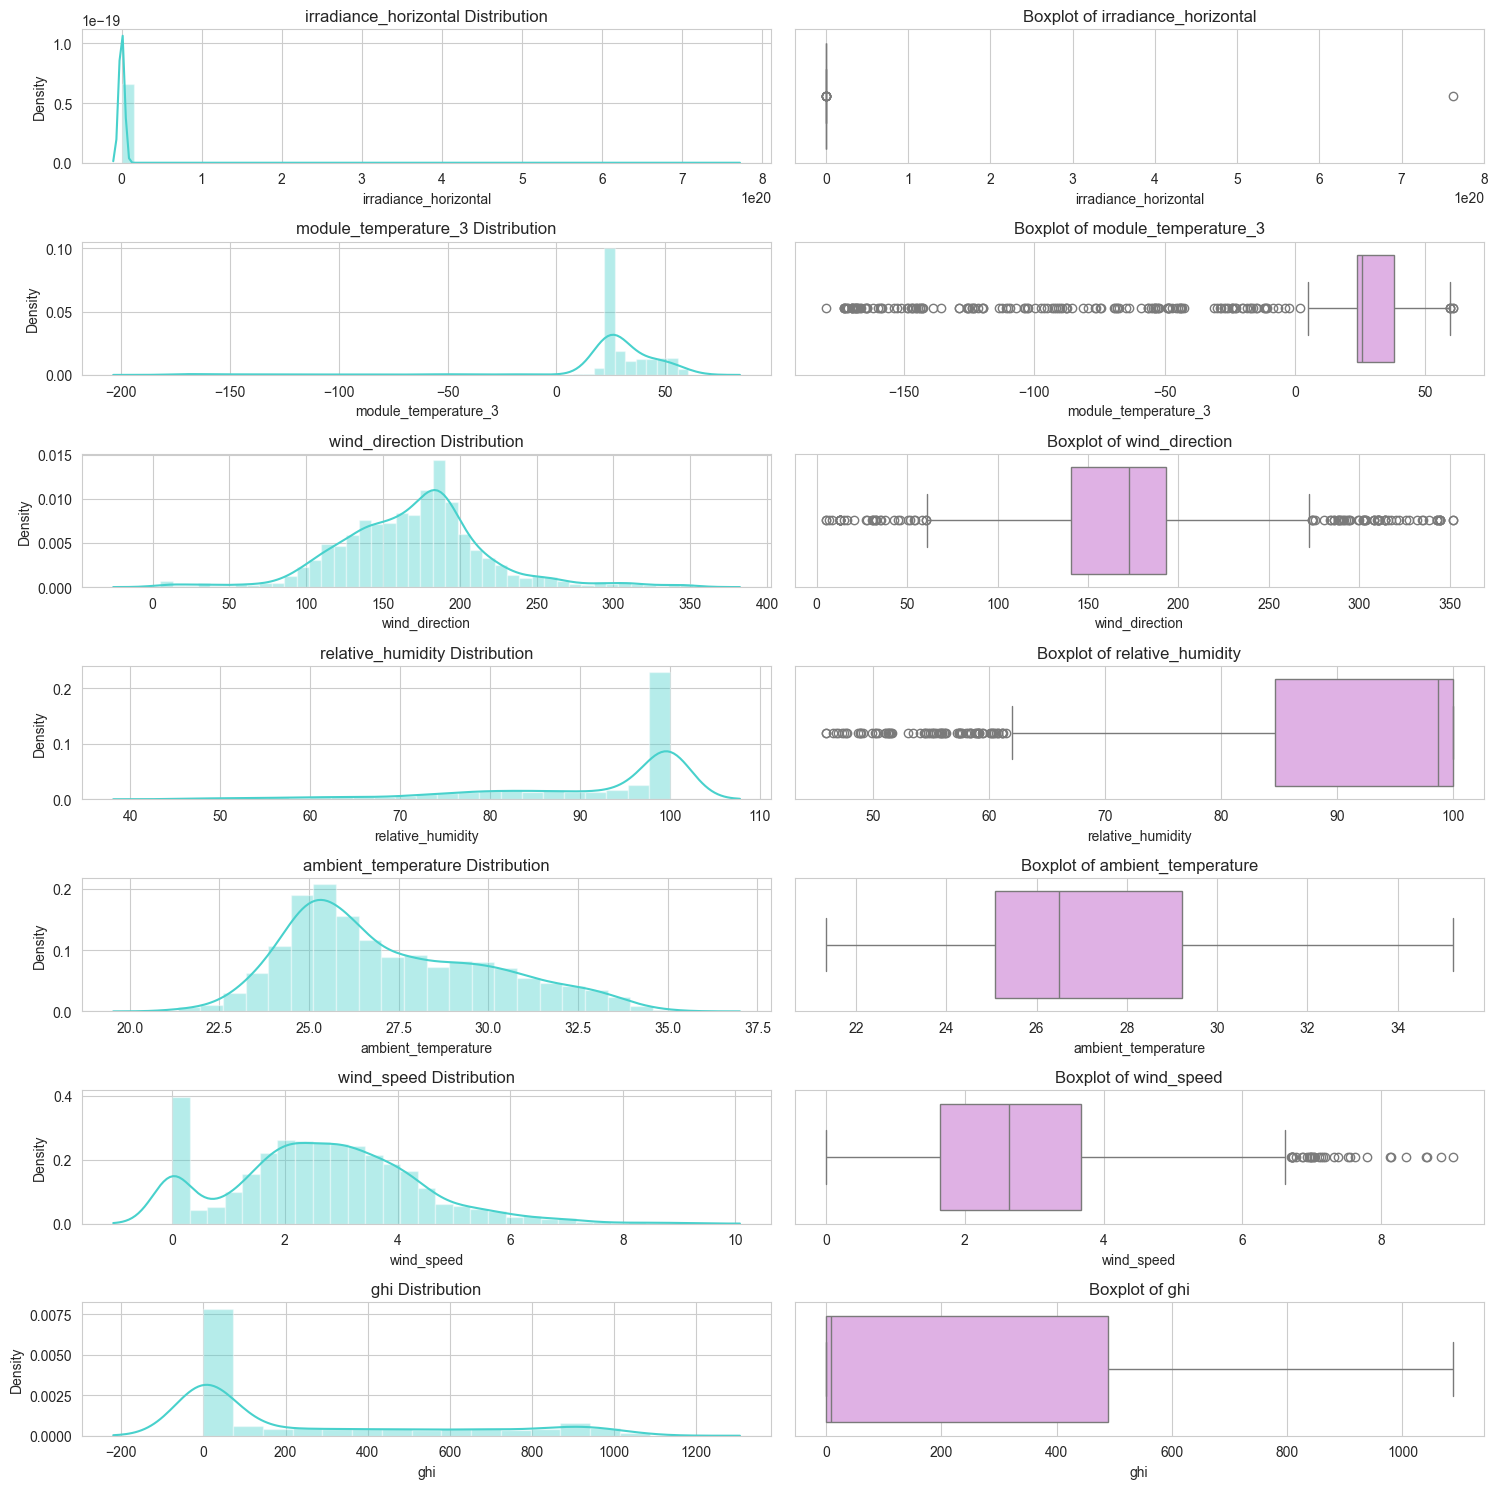

In [49]:
cols = ['irradiance_horizontal','module_temperature_3','wind_direction','relative_humidity','ambient_temperature','wind_speed','ghi']

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))

for i, col in enumerate(cols):
    sns.distplot(train_df[col], ax=ax[i, 0], color='mediumturquoise')
    sns.boxplot(data=train_df, x=train_df[col], ax=ax[i, 1], color='#E6A9EC')
    ax[i, 0].set_title(f"{col} Distribution")
    ax[i, 1].set_title(f"Boxplot of {col}")


plt.tight_layout()

In [50]:
# Outlier detection using IQR method
outlier_summary = []

for col in cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary.append({
        "Feature": col,
        "Num_Outliers": len(outliers),
        "Percent_Outliers": round(100 * len(outliers) / len(df), 2)
    })


outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Percent_Outliers", ascending=False)
outlier_df.reset_index(drop=True, inplace=True)
outlier_df.head(15)

,Feature,Num_Outliers,Percent_Outliers
0,module_temperature_3,158,7.24
1,wind_direction,97,4.45
2,relative_humidity,79,3.62
3,wind_speed,34,1.56
4,irradiance_horizontal,8,0.37
5,ambient_temperature,0,0.00
6,ghi,0,0.00


##### Using IQR method, we have identified count and percentage of outliers in different features.
##### "module_temperature_3" has maximum number of outliers (7.24%) followed by "wind_direction" amd "relative_humidity".

In [51]:
def cap_outliers_iqr(df, col):
    """    
    Cap outliers in a DataFrame column using the IQR method.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the column.
        col (str): The name of the column to cap outliers in.
        
    Returns:
        pd.DataFrame: The DataFrame with capped outliers in the specified column.
        
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df


for col in ["module_temperature_3", "wind_direction", "relative_humidity", "wind_speed"]:
    train_df = cap_outliers_iqr(train_df, col)

##### Further, I have decided to cap these outliers for the above mentioned features using IQR method.

*--------------------------------------------------------------------------------------------------------------------------------------------------------*

## Scaling & Train-Test Split

In [52]:
X = train_df.drop('ghi', axis=1)
y = train_df['ghi']

In [53]:
X.shape

(2182, 16)

In [54]:
y.shape

(2182,)

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [56]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 42)

In [57]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
X_test = scaler.transform(X_test)

In [58]:
def evaluate_model(name, model, x_val, y_val):
    """
    Function to evaluate the model on validation data, including RMSE, MAE and R².
    Assumes y_val has already been cleaned (no values between -1 and 1).
    """
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    

    print(f"\n{name} Validation Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    
    return rmse, mae, r2

###  Custom MAPE Function: `custom_mape`

This function calculates a more stable and realistic version of **Mean Absolute Percentage Error (MAPE)** by excluding `y_true` values that are close to zero.

####  Why This Function Was Needed
Standard MAPE is defined as:

$$
\text{MAPE} = \frac{1}{n} \sum \left| \frac{y_{\text{true}} - y_{\text{pred}}}{y_{\text{true}}} \right| \times 100
$$

However, when `y_true` is **zero or near zero**, this formula becomes unstable:
- It can result in division by zero or extremely large error values.
- This is problematic in our dataset, since **GHI is often 0 during nighttime** (when there’s no sunlight).

####  What This Function Does
- It **excludes values** of `y_true` that fall within a specified range around zero (default: -1 to 1).
- Only the remaining values are used to compute MAPE.
- This avoids unfair penalties and focuses evaluation on times when **GHI is meaningfully greater than zero**.

####  Benefit
This approach gives a **more robust and interpretable MAPE**, especially for solar forecasting tasks where many true values are zero by nature.

---


In [59]:
def custom_mape(y_true, y_pred, exclude_range=(-1, 1)):
    
    """
    Custom Mean Absolute Percentage Error (MAPE) function that excludes values of y_true within a specified range around zero.
    Args:
        y_true (array-like): True values.
        y_pred (array-like): Predicted values.
        exclude_range (tuple): Range around zero to exclude from MAPE calculation (default: (-1, 1)).
    Returns:
        float: Custom MAPE value.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    lower, upper = exclude_range
    mask = (y_true < lower) | (y_true > upper)
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


## Model Building

#### Linear Regression

In [60]:
## Fitting Linear Regression model

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [61]:
evaluate_model("Linear Regression", lr_model, x_val, y_val)


Linear Regression Validation Results:
RMSE: 0.00
MAE: 0.00
R² Score: 1.00


(np.float64(1.9698724688332035e-12), 1.698572124550014e-12, 1.0)

##### We can conclude from the above result that model is overfitting on training dataset.

In [62]:
## Checking MAPE for Linear Regression model on validation set

custom_mape(y_val, lr_model.predict(x_val))

np.float64(4.449452459842987e-12)

In [63]:
custom_mape(Y_test, lr_model.predict(X_test))

np.float64(1348.562067847875)

##### We can see that Linear Regression model is performing poorly on test data due to overfitting, so we go ahead and try with other models.

*---------------------------------------------------------------------------------------------------------------------------------------------------*

#### Random Forest Regressor

In [64]:
## Fitting Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

preds = rf.predict(x_val)
print("MAPE (GHI ≥ 1):", custom_mape(y_val, preds)
)

MAPE (GHI ≥ 1): 25.08716205963205


In [65]:
evaluate_model("Random Forest", rf, x_val, y_val)


Random Forest Validation Results:
RMSE: 41.17
MAE: 16.01
R² Score: 0.99


(np.float64(41.17352525439434), 16.005310490830656, 0.9854645379594469)

In [66]:

## Hyperparameter tuning for Random Forest Regressor using GridSearchCV

rf_tuned = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring= "neg_mean_absolute_error"
)


grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [67]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg MAE):", grid_search.best_score_)
best_model_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Neg MAE): -16.829935148240057


In [68]:
preds_tuned = best_model_rf.predict(x_val)
print("MAPE (GHI <> (-1,1)):", custom_mape(y_val, preds_tuned)
)

MAPE (GHI <> (-1,1)): 24.825839490808534


In [69]:
custom_mape(Y_test, best_model_rf.predict(X_test))

np.float64(18.986470613709734)

##### The Mean Absolute Percentage Error (MAPE) for the Random Forest Regressor model is approximately 18.99%.

##### This means that, on average, the model's predictions deviate from the actual GHI values by around 19% , only on the data points where GHI is significantly non-zero (since the custom MAPE excludes values close to 0).

*---------------------------------------------------------------------------------------------------------------------------------------------------*

### XGBoost Regressor

In [70]:
# Training XGBoost model

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)


y_pred = xgb_model.predict(x_val)
mape_excl_near_zero = custom_mape(y_val, y_pred)

mape_excl_near_zero

np.float64(22.351479780591163)

In [71]:
evaluate_model("XGBoost", rf, x_val, y_val)


XGBoost Validation Results:
RMSE: 41.17
MAE: 16.01
R² Score: 0.99


(np.float64(41.17352525439434), 16.005310490830656, 0.9854645379594469)

In [72]:
## Hyperparameter tuning for XGBoost Regressor using GridSearchCV

xgb_model_tuned = XGBRegressor(objective='reg:squarederror', random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # MAE (lower is better)
    cv=3,
    verbose=2,
    n_jobs=-1
)


grid_search_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END co

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=300,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [73]:
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best MAE (positive):", grid_search_xgb.best_score_)  # Convert to positive

best_xgb_model = grid_search_xgb.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best MAE (positive): -12.473899501843642


In [74]:
preds_tuned_xgb = best_xgb_model.predict(x_val)
print("MAPE (GHI <> (-1,1)):", custom_mape(y_val, preds_tuned_xgb)
)

MAPE (GHI <> (-1,1)): 20.11285204094902


In [75]:
custom_mape(Y_test, best_xgb_model.predict(X_test))

np.float64(16.655561896691204)

##### The custom MAPE for the XGBoost Regressor model is approximately 16.66%.

##### This means the model's predictions deviate from the actual GHI values by an average of 16.66%, considering only the data points where GHI is meaningfully non-zero.

##### Compared to the Random Forest model (≈ 18.99%), this result indicates that XGBoost provides more accurate and consistent forecasts for solar irradiance.

*---------------------------------------------------------------------------------------------------------------------------------------------------*

### Evaluation of model on test data

In [76]:
def drop_unwanted_columns(df):
    
    """
    Drop unwanted columns from the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame from which to drop columns.
        
    Returns:
        pd.DataFrame: The DataFrame with unwanted columns dropped.
    """
    
    cols_to_drop = [
        'Unnamed: 0', 'horizontal_radiation_2', 'incident_radiation_2', 'reflected_radiation_2',
        'module_temperature_2', 'horizontal_radiation_1', 'incident_radiation_4', 'incident_radiation_3',
        'reflected_radiation_4', 'reflected_radiation_3', 'module_temperature_1', 'irradiance_global_reference',
        'incident_radiation_1', 'reflected_radiation_1', 'horizontal_radiation_3'
    ]
    return df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [77]:
def preprocess_test_data(test_df, temp3_median,wind_median,relative_humidity_median,ambient_temperature_median,wind_speed_median):
    
    """
    Preprocess the test DataFrame by dropping unwanted columns, filling missing values, and creating new features.
    """
    test_df = test_df.copy()

    # Drop unnecessary columns
    test_df = drop_unwanted_columns(test_df)

    # Fill NA in module_temperature_3,wind_direction,relative_humidity,ambient_temperature,wind_speed with training median
    test_df['module_temperature_3'].fillna(temp3_median, inplace=True)
    test_df['wind_direction'].fillna(wind_median, inplace=True)
    test_df['relative_humidity'].fillna(relative_humidity_median, inplace=True)
    test_df['ambient_temperature'].fillna(ambient_temperature_median, inplace=True)
    test_df['wind_speed'].fillna(wind_speed_median, inplace=True)

    # Timestamp-based features
    test_df["timestamp"] = pd.to_datetime(test_df["timestamp"])
    test_df["hour"] = test_df["timestamp"].dt.hour
    test_df["month"] = test_df["timestamp"].dt.month
    test_df['day'] = test_df['timestamp'].dt.day
    test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

    # part_of_day feature
    def part_of_day(hour):
        if 5 <= hour < 8:
            return "dawn"
        elif 8 <= hour < 12:
            return "morning"
        elif 12 <= hour < 16:
            return "afternoon"
        elif 16 <= hour < 19:
            return "evening"
        else:
            return "night"

    test_df["part_of_day"] = test_df["hour"].apply(part_of_day)

    # Lag features
    test_df["ghi_lag_1"] = test_df["ghi"].shift(1)
    test_df["ghi_diff_1"] = test_df["ghi"] - test_df["ghi"].shift(1)
    test_df['ghi_lag_1'].fillna(method='bfill', inplace=True)
    test_df['ghi_diff_1'].fillna(method='bfill', inplace=True)

    # One-hot encode part_of_day
    test_df = pd.get_dummies(test_df, columns=["part_of_day"], drop_first=True)

    # Convert boolean to int
    for col in test_df.columns:
        if test_df[col].dtype == bool:
            test_df[col] = test_df[col].astype(int)

    # Final split
    X = test_df.drop('ghi', axis=1)
    y = test_df['ghi']
    return X, y

In [78]:
df_test.isna().sum()

Unnamed: 0                        0
timestamp                         0
irradiance_global_reference       0
irradiance_horizontal             0
module_temperature_1              5
module_temperature_2              7
module_temperature_3              7
wind_direction                  107
relative_humidity               107
horizontal_radiation_1          107
horizontal_radiation_2         1389
horizontal_radiation_3            0
incident_radiation_1            107
incident_radiation_2              6
incident_radiation_4              7
incident_radiation_3              0
reflected_radiation_1           108
reflected_radiation_2             6
reflected_radiation_4             9
reflected_radiation_3             0
ambient_temperature             107
wind_speed                      107
ghi                               0
dtype: int64

#####  Filling missing values in test dataset using training data statistics

In [79]:
temp3_median = train_df["module_temperature_3"].median()
wind_median = train_df["wind_direction"].median()
relative_humidity_median = train_df["relative_humidity"].median()
ambient_temperature_median = train_df["ambient_temperature"].median()
wind_speed_median = train_df["wind_speed"].median()

In [80]:
X_test_df, y_test_df = preprocess_test_data(df_test,temp3_median,wind_median,relative_humidity_median,ambient_temperature_median,wind_speed_median)

In [81]:
X_test_df.shape

(1392, 17)

In [82]:
## Dropping 'timestamp' column from test DataFrame

X_test_df.drop('timestamp', axis=1, inplace=True)

In [83]:
## Scaling the test data using the same scaler as the training data

X_test_df = scaler.transform(X_test_df)

In [84]:
## Checking MAPE for XGBoost model on test set

custom_mape(y_test_df, best_xgb_model.predict(X_test_df))

np.float64(14.528023175354123)

##### The custom MAPE of the best XGBoost model on the test dataset is approximately 14.53%.

##### This indicates that the model's predictions deviate from the actual GHI values by an average of 14.53%, excluding near-zero values.
##### This is a strong performance, suggesting that the model generalizes well to unseen data and is reliable for real-world solar irradiance forecasting.

In [85]:
df_pred = best_xgb_model.predict(X_test_df)

In [86]:
df_pred = pd.DataFrame(df_pred, columns=['predicted_ghi'])

In [87]:
df_pred.head(10)

,predicted_ghi
0,-0.263933
1,0.167619
2,0.167619
3,0.167619
4,0.167619
5,0.167619
6,36.018772
7,342.298950
8,669.540833
9,857.635742


In [88]:
## Creating a DataFrame with actual GHI values for comparison

df_actual = df_test[["timestamp", "ghi"]].copy()
df_actual.rename(columns={"ghi": "actual_ghi"}, inplace=True)

## Merging actual and predicted GHI values into a final DataFrame

df_final = pd.concat([df_actual.reset_index(drop=True), df_pred.reset_index(drop=True)], axis=1)
df_final.head(10)

,timestamp,actual_ghi,predicted_ghi
0,1/1/2025 0:00,0.000000,-0.263933
1,1/1/2025 1:00,0.000000,0.167619
2,1/1/2025 2:00,0.000000,0.167619
3,1/1/2025 3:00,0.000000,0.167619
4,1/1/2025 4:00,0.000000,0.167619
5,1/1/2025 5:00,0.000000,0.167619
6,1/1/2025 6:00,33.486111,36.018772
7,1/1/2025 7:00,333.226471,342.298950
8,1/1/2025 8:00,693.118784,669.540833
9,1/1/2025 9:00,866.005376,857.635742


In [89]:
df_final.shape

(1392, 3)

##### This will handle cases where actual GHI is between -1 and 1 by setting percentage error to 0, and for other cases, it will calculate the percentage error as the absolute difference between predicted and actual GHI divided by actual GHI, multiplied by 100.


In [90]:
## Calculating percentage error between predicted and actual GHI values for each row

df_final["percentage_error"] = np.where(
    (df_final["actual_ghi"] > -1) & (df_final["actual_ghi"] < 1),
    0,
    np.abs(df_final["predicted_ghi"] - df_final["actual_ghi"]) / df_final["actual_ghi"] * 100
)

In [91]:
df_final.head(10)

,timestamp,actual_ghi,predicted_ghi,percentage_error
0,1/1/2025 0:00,0.000000,-0.263933,0.000000
1,1/1/2025 1:00,0.000000,0.167619,0.000000
2,1/1/2025 2:00,0.000000,0.167619,0.000000
3,1/1/2025 3:00,0.000000,0.167619,0.000000
4,1/1/2025 4:00,0.000000,0.167619,0.000000
5,1/1/2025 5:00,0.000000,0.167619,0.000000
6,1/1/2025 6:00,33.486111,36.018772,7.563318
7,1/1/2025 7:00,333.226471,342.298950,2.722617
8,1/1/2025 8:00,693.118784,669.540833,3.401719
9,1/1/2025 9:00,866.005376,857.635742,0.966464


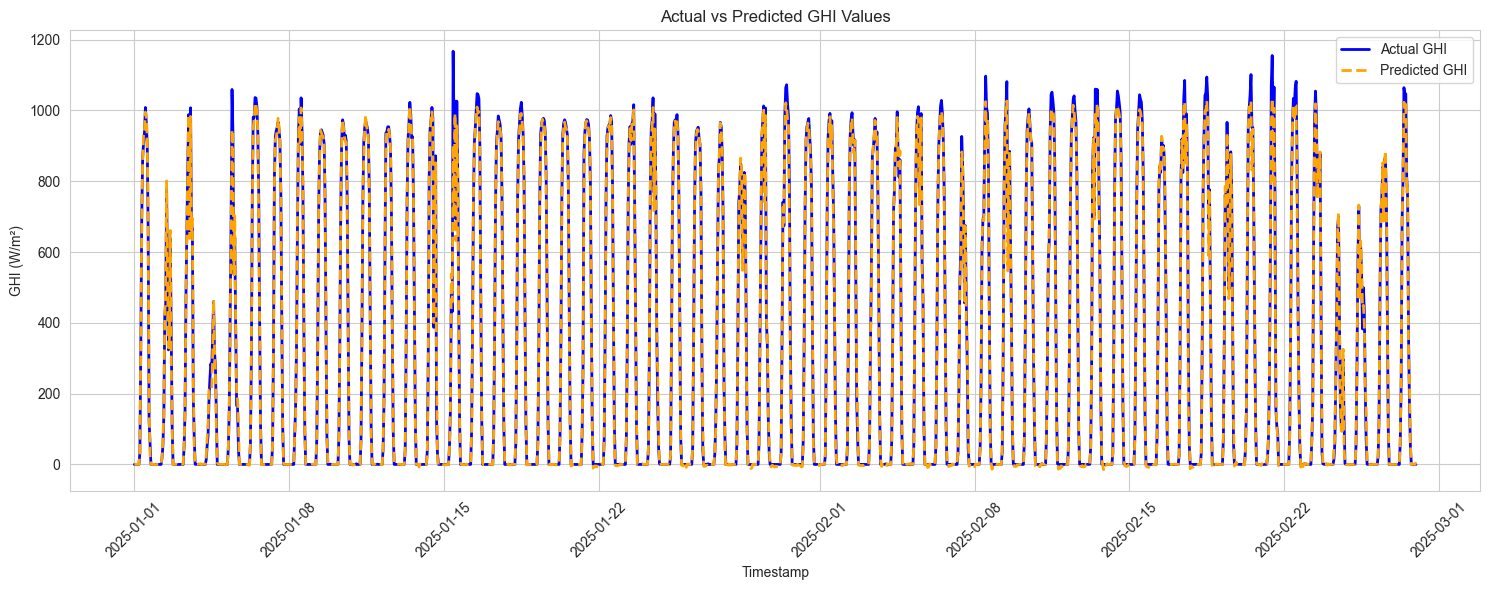

In [ ]:
## Create line plot to visualize actual vs predicted GHI values

plt.figure(figsize=(15, 6))
plt.plot(df_final['timestamp'], df_final['actual_ghi'], label='Actual GHI', color='blue', linewidth=2)
plt.plot(df_final['timestamp'], df_final['predicted_ghi'], label='Predicted GHI', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted GHI Values')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
## Ensure timestamp is in datetime format

df_final["timestamp"] = pd.to_datetime(df_final["timestamp"])


df_final["Month"] = df_final["timestamp"].dt.to_period("M").astype(str)

# Group by Month and calculate MAPE
monthly_mape = (
    df_final.groupby("Month")
    .apply(lambda df: custom_mape(df["actual_ghi"], df["predicted_ghi"]))
    .reset_index(name="avg_mape_for_ghi")
)

monthly_mape["avg_mape_for_ghi"] = monthly_mape["avg_mape_for_ghi"].round(3)


print(monthly_mape)

     Month  avg_mape_for_ghi
0  2025-01             8.423
1  2025-02            21.281


In [94]:
df_final.drop(columns=["Month"], inplace=True)

In [95]:
df_final["percentage_error"] = df_final["percentage_error"].round(3)

In [96]:
df_final.to_csv('Vaibhav.csv', index=False)

In [97]:
monthly_mape.to_csv('Monthly MAPE summary .csv', index=False)